In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Настройки
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_palette("husl")

# Пути (проверьте!)
INPUT_CSV = 'test_results.csv'
OUTPUT_DIR = 'plots_analysis'
Path(OUTPUT_DIR).mkdir(exist_ok=True)

In [15]:
# Функция для построения графиков
def plot_combined_methods(df, matrix_sizes):
    for size in matrix_sizes:
        plt.figure(figsize=(14, 8))
        size_data = df[df['size_num'] == size]
        
        # Группируем по комбинации метод+проекция и рангу
        avg_times = size_data.groupby(['method_proj', 'true_rank'])['time'].mean().reset_index()
        
        # Строим график для каждой комбинации
        for method in methods:
            method_data = avg_times[avg_times['method_proj'] == method]
            if not method_data.empty:
                plt.plot(method_data['true_rank'], method_data['time'], 
                        label=method, linewidth=2, marker='o', markersize=6)
        
        plt.title(f'Среднее время выполнения (Матрица {size}x{size})', fontsize=14, pad=20)
        plt.xlabel('Ранг', fontsize=12, labelpad=10)
        plt.ylabel('Время (секунды)', fontsize=12, labelpad=10)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Сохраняем
        filename = os.path.join(OUTPUT_DIR, f'time_vs_rank_{size}x{size}.png')
        plt.tight_layout()
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Сохранено: {filename}")

In [35]:
# Загрузка данных
try:
    df = pd.read_csv(INPUT_CSV)
    print(f"Успешно загружено {len(df)} записей")
except Exception as e:
    print(f"Ошибка: {e}")
    raise

Успешно загружено 336 записей


In [36]:
# Создаем комбинированный столбец "метод_проекция"
df['method_proj'] = df['method'] + '_' + df['projections'].astype(str)
methods = df['method_proj'].unique()

print("\nУникальные комбинации метод+проекция:")
print(methods)

# Извлекаем размер матрицы (исправленное регулярное выражение)
df['size_num'] = df['matrix_size'].str.extract(r'(\d+)').astype(int)
matrix_sizes = sorted(df['size_num'].unique())


Уникальные комбинации метод+проекция:
['hadamar_False' 'hadamar_True' 'fft_False' 'fft_True' 'built_in_False'
 'built_in_True' 'classic_False']


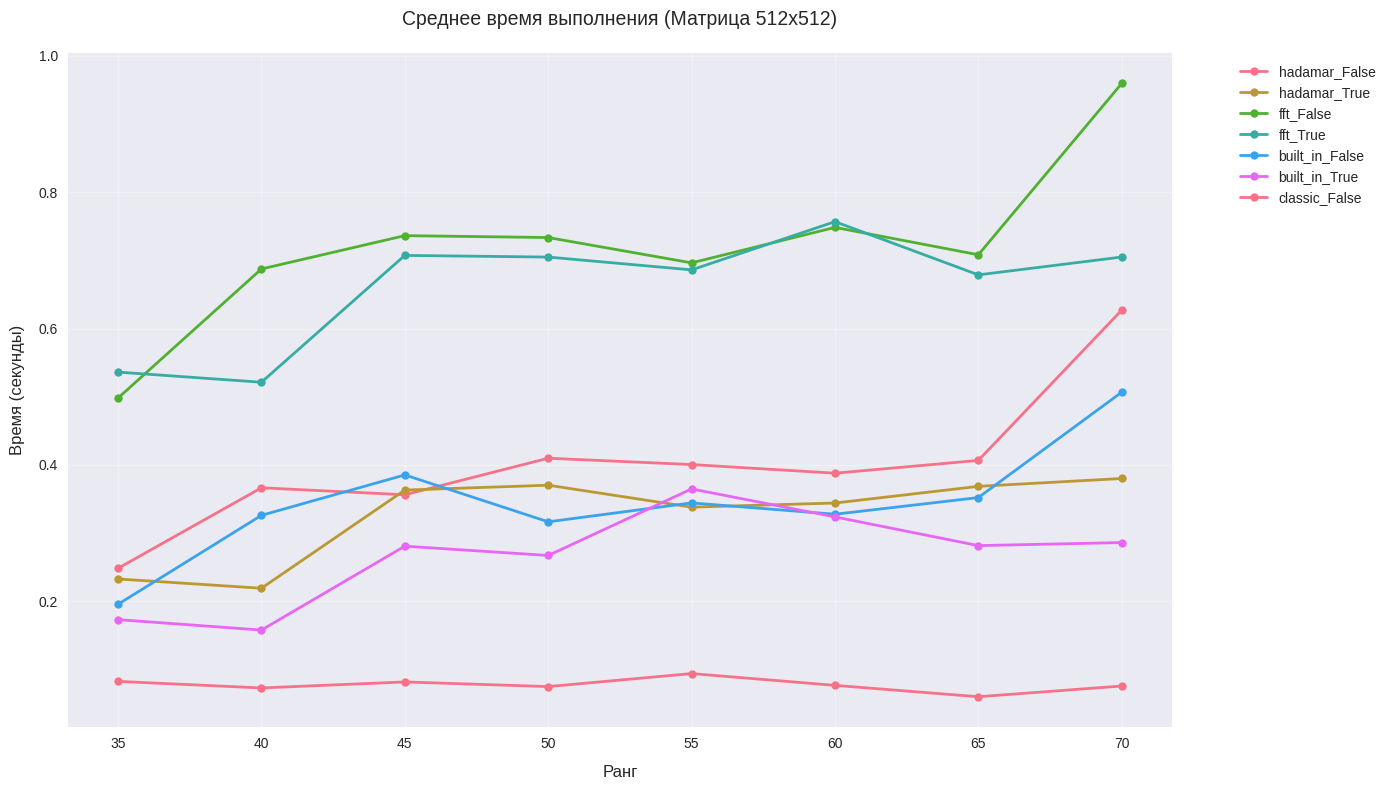

Сохранено: plots_analysis/time_vs_rank_512x512.png

Сводная статистика по времени выполнения:


mean       std  count
method_proj    size_num true_rank                           
built_in_False 512      35         0.195265  0.036742      6
                        40         0.325771  0.037669      6
                        45         0.385097  0.051180      6
                        50         0.316290  0.021614      6
                        55         0.344059  0.050573      6
                        60         0.327396  0.042471      6
                        65         0.351872  0.056555      6
                        70         0.506556  0.026229      6
built_in_True  512      35         0.172700  0.031555      6
                        40         0.157404  0.013193      6

In [37]:
plot_combined_methods(df, matrix_sizes)

# Дополнительно: сводная таблица
print("\nСводная статистика по времени выполнения:")
stats_table = df.groupby(['method_proj', 'size_num', 'true_rank'])['time'].agg(['mean', 'std', 'count'])
display(stats_table.head(10))